In [7]:
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import pandas as pd
from sklearn.datasets import *
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy

In [8]:
#Import Data array

array = pd.read_csv("data.csv", header=None)

x_values = array.iloc[:,0]
y_values = array.iloc[:,1]
z_values = array.iloc[:,2]

#Combine data into single array

X = np.array(list(zip(x_values, y_values)))

In [9]:
#Define Euclidian Distance

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [14]:
# Number of clusters

k = 3

# Coordinates of random centroids, away from boundaries

C_x = np.random.uniform(np.min(X)+np.mean(X)/10, np.max(X)-np.mean(X)/10, size=k)
C_y = np.random.uniform(np.min(X)+np.mean(X)/10, np.max(X)-np.mean(X)/10, size=k)

C = np.array(list(zip(C_x, C_y)))

[[3.82742123 5.90254658]
 [3.57522145 2.93749259]
 [5.88547984 2.35972403]]


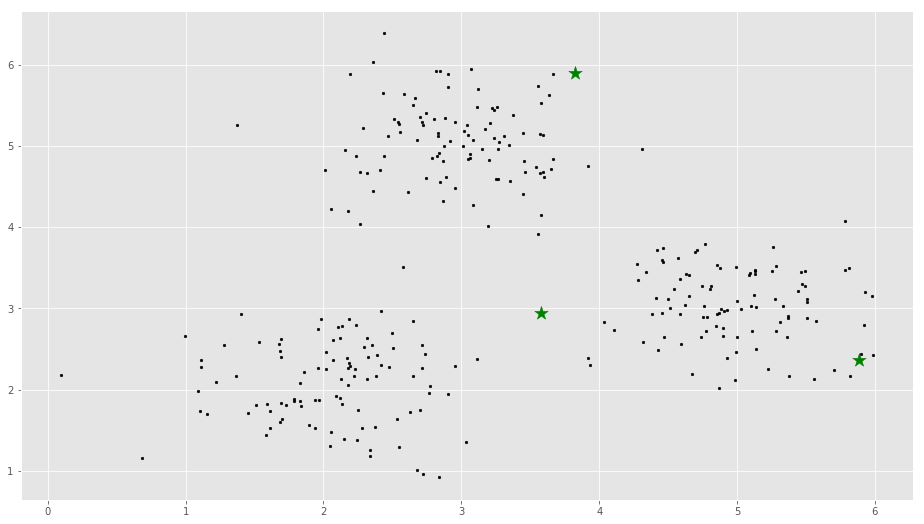

In [18]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(x_values, y_values, c='black', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [19]:
# Updating C vector for each iteration

C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))  #(0,1...k)

# Error function of centroid distance

error = dist(C, C_old, None)

#Loop for updating centroid location

while error != 0:
    # Assignment to local cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Update centroid locations
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

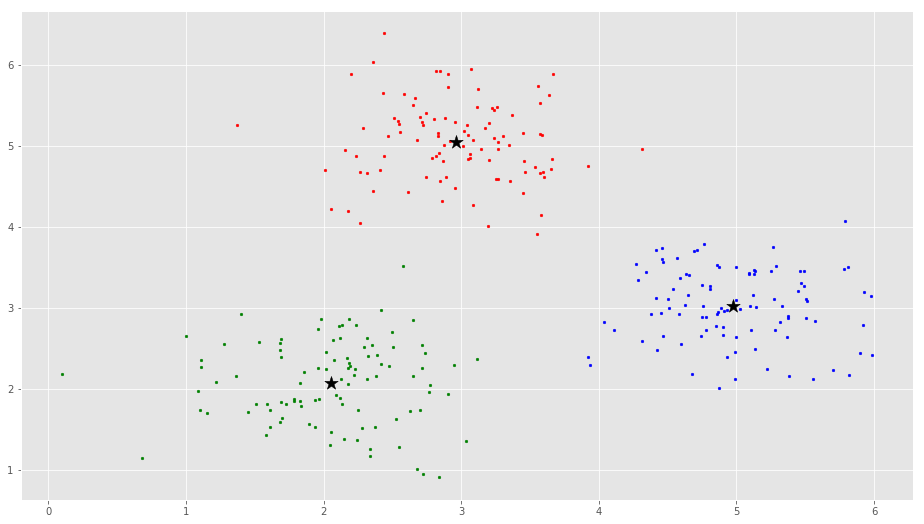

In [20]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')